<a href="https://colab.research.google.com/github/jx-dohwan/-Deep_Learning_from_Scratch_2_study/blob/main/CH2_%EC%9E%90%EC%97%B0%EC%96%B4%EC%99%80_%EB%8B%A8%EC%96%B4%EC%9D%98_%EB%B6%84%EC%82%B0_%ED%91%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH2_자연어와 단어의 분산 표현
> 자연어 처리의 본질적 문제는 컴퓨터가 우리의 말을 알아듣게 만드는 것이다. 그래서 이번장에서 컴퓨터에 말을 이해시시킨다는 것이 무슨 뜻인지, 그리고 어떤 방법들이 존재하는지를 중심으로 알아보겠다.

## 1. 자연어 처리란
> 우리가 평소에 쓰는 말 자연어(natural language)라고 한다. 자연어 처리란 natural language processing로 자연어를 처리하는 분야이다.

### 1) 단어의 의미
- 시소러스를 활용한 기법
- 통계 기반 기법
- 추론 기반 기법

## 2. 시소러스
> 시소러스란 유의어 사전으로 '뜻이 같은 단어(동의어)'나 비슷한 단어(유의어)'가 한 그룹으로 분류되어 있다. 또한 자연어 처리에 이용되는 시소러스에서는 단어 사이의 상위와 하위 혹은 전체와 부분등 세세한 관계까지 정의해 둔 경우가 있다. 

- 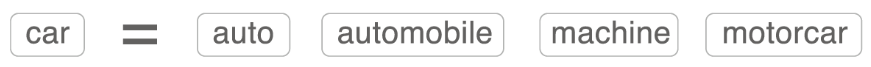

- 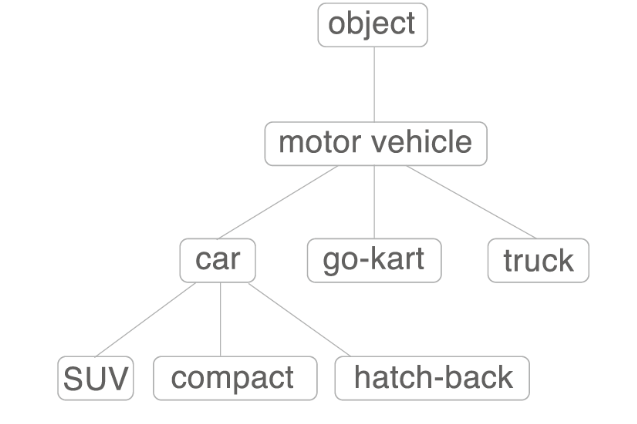

### 1)WordNet
> 자연어 처리 분야에서 가장 유명한 시소러스는 WordNet이다. WordNet은 프린스턴 대학교에서 1985년부터 구축하기 시작한 전통있는 시소러스이다. 

### 2) 시소러스의 문제점
- 시대 변화에 대응하기 어렵다.
- 사람을 쓰는 비용은 크다.
- 단어의 미묘한 차이를 표현할 수 없다.

## 3. 통계 기반 기법
> 이제부터 통계 기반 기법을 살펴보면서 말뭉치(corpus)를 이용할 것이다. 말뭉치란 간단히 말하면 대량의 텍스트 데이터이다.

### 1) 파이썬으로 말뭉치 전처리 하기

In [ ]:
text = 'You say goodbye and I say hello.'

In [ ]:
text = text.lower()
text = text.replace('.',' .')
text

'you say goodbye and i say hello .'

In [ ]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [ ]:
word_to_id = {}
id_to_word = {}
for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

In [ ]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [ ]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [ ]:
id_to_word[1]

'say'

In [ ]:
word_to_id['hello']

5

- 딕셔너리를 사용하면 단어를 가지고 ID를 검색하거나 반대로 단어 ID를 가지고 단어를 검색할 수 있다.

In [ ]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [ ]:
def preprocess(text):
  text = text.lower()
  text = text.replace('.',' .')
  words = text.split(' ')

  word_to_id = {}
  id_to_word = {}
  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word

  corpus = np.array([word_to_id[w] for w in words])

  return corpus, word_to_id, id_to_word

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

### 2) 단어의 분산 표현
> 단어의 분산 표현은 단어를 고정 길이의 밀집벡터(dense vector)로 표현한다. 밀집벡터라 함은 대부분의 원소가 0이 아닌 실수인 벡터를 말한다. 이러한 단어의 분산 표현을 어떻게 구축할 것인가가 앞으로 살펴볼 중요한 주제이다.

### 3) 분포 가설
> 단어의 의미는 주변 단어에 의해 형성된다.는 뜻으로 단어를 벡터로 표현하는 최근 연구도 대부분 이 가설이 기초한다.<br><br> 분포 가설이 말하고자 하는 바는 매우 간단하다. 단어자체에는 의미가 없고, 그 단어가 사용된 맥락(context)이 의미를 형성한다는 것이다. <br><br> 맥락이란 특정 단어를 중심에 둔 그 주변 단어를 말하며 맥락의 크기를 윈도우 크기라고 한다. 윈도우 크기가 1이면 좌우 한 단어씩이, 윈도우 크기가 2이면 좌우 두 단어씩 맥락에 포함된다.

### 4) 동시발생 행렬
> 분포 가설에 기초해 단어를 벡터로 나타내는 방법을 생각해보자. 

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/인공지능/밑시딥2/')
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


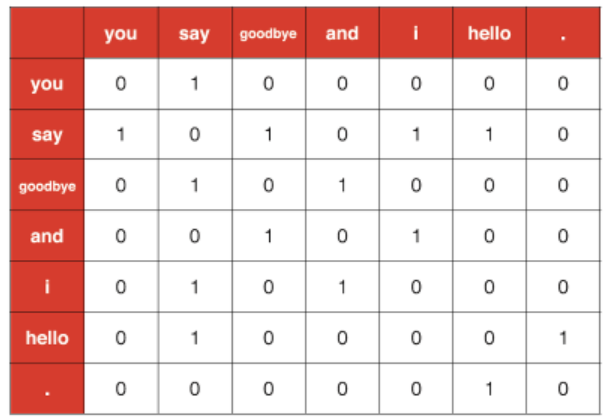

- 이 표가 행렬의 형태를 띤다는 뜻에서 동시발생 행렬이라고 한다.

In [ ]:
C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]

], dtype=np.int32)

In [ ]:
print(C[0])
print(C[4])
print(C[word_to_id['goodbye']])

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


In [ ]:
def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32) # 0으로 채워진 2차원 배열로 초기화

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size + 1):
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1
      
      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1
  return co_matrix

### 5) 벡터 간 유사도
> 벡터 사이의 유사도를 측정하는 방법은 다양하다. 대표적으로는 벡터의 내적이나 유클리드 거리 등을 꼽을 수 있다. 그 외에도 다양하지만 단어 벡터의 유사도를 나타낼 때는 코사인 유사도를 자주 사용한다. 

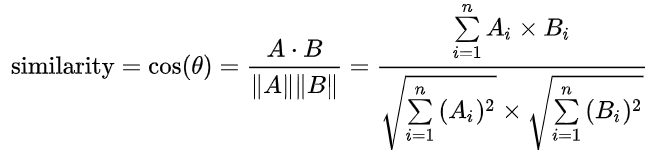

- 분자에는 벡터의 내적이, 분모에는 각 벡터의 norm이 등장한다. 
  - norm은 벡터의 크기를 나타낸 것으로 여기서는 L2 norm으로 계산한다.
  - L2 norm은 벡터의 각 원소를 제곱해 더한 후 다시 제곱근을 구해 계산한다.
- 핵심은 벡터를 정규화하고 내적을 구하는 것이다.

In [ ]:
def cos_similarity(x, y, eps=1e-8):
  nx = x / np.sqrt(np.sum(x**2))
  ny = y / np.sqrt(np.sum(y**2))
  return np.dot(nx, ny)

- x, y는 넘파이 배열이라고 가정
- 먼저 벡터 x, y를 정규화한 후 두 벡터의 내적을 구함
- 인수로 제로 벡터가 들어오면 0으로 나누기때문에 오류가 발생한다. 이러한 문제르 해결하기 위해 eps를 인수로 받도록 하고, 이 인수에 값을 지정한다. 1e-8(0.00000001)이 되도록 설정한다.

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥2/")
from common.util import preprocess, create_co_matrix, cos_similarity
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

co = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(co, c1))

0.7071067691154799


### 6) 유사도 단어의 랭킹 표시

In [ ]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''유사 단어 검색

    :param query: 쿼리(텍스트)
    :param word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    :param id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    :param word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    :param top: 상위 몇 개까지 출력할 지 지정
    '''
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 코사인 유사도 계산
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort(): # argsort로 넘파이 배열의 원소를 오름차순으로 정렬한다.
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [ ]:
x = np.array([100, -20, 2])
x.argsort()

array([1, 2, 0])

In [ ]:
(-x).argsort()

array([0, 2, 1])

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/인공지능/밑시딥2/')
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vacab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


- 동시발생 행렬을 이용하면 단어를 벡터로 표현할 수 있다.

## 4. 통계 기반 기법 개선하기

### 1) 상호정보량
> 앞 절에서 본 동시발생 행렬의 원소는 두 단어가 동시에 발생한 횟수를 나타낸다. 그러나 이 발생횟수라는 것은 사실 그리 좋은 특징은 아니다. 고빈도 단어로 눈을 돌려보면 그 이유를 알 수 있다. the와 같은 단어가있다. 불용어라고도 한다.<br><br> 이 문제를 해결하기 위해 점별 상호정보량(PMI)이라는 척도를 사용한다.

- 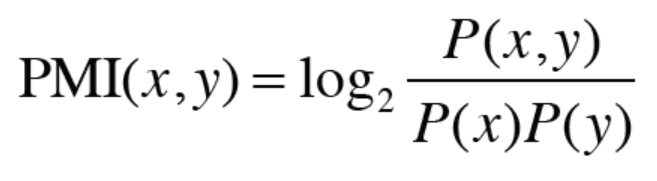

- p(x)는 x가 일어날 확률
- p(y)는 y가 일어날 확률
- p(x,y)는 x와 y가 동시에 일어날 확률을 뜻한다.
> PMI값이 높을수록 관련성이 높다는 의미이다.<br><br> p(x,y)는 단어 x와 y가 동시에 발생활 확률 <br><br>p(x)는 단어 x가 말뭉치에 등장할 확률 <br><br> p(y)는 단어 y가 말뭉치에 등장할 확률

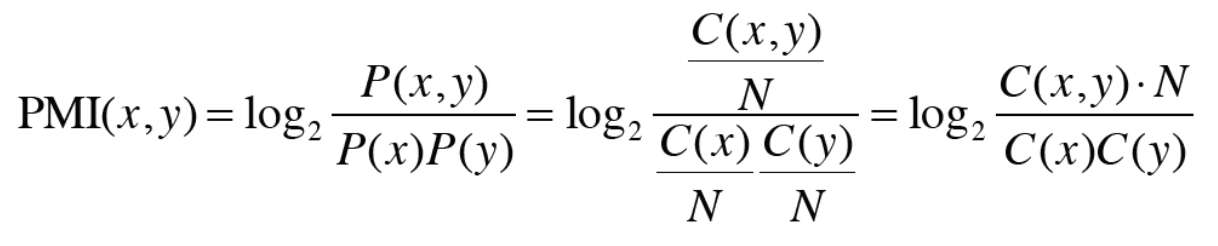

- C(x,y)는 단어 x와 y가 동시발생하는 횟수
- C(x), C(y)는 말뭉치가 각각 단어 x와 y의 등장횟수이다.
- N은 말뭉치에 포함된 단어의 수

> PMI를 이용하면 car는 the보다 drive와의 관련성이 강하다. 우리가 원하던 결과이다. 이렇게 나온 이유는 단어가 단독으로 출현하는 횟수가 고려되었기 때문이다. 그런데 문제가 발행했다. log20 = -무한대가 된다. 이 문제를 피하기 위해 실제로 구현할 때는 양의 상호정보량(PPMI)을 사용한다.

- 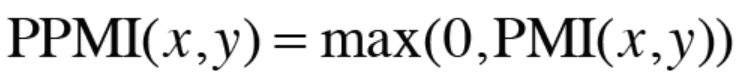

- 이 식에 따르면 PMI가 음수일 때는 0으로 취급한다. 
- 단어 사이의 관련성을 0이상의 실수로 나타낼 수 있다.
- 동시발생 행렬을 PPMI 행렬로 변환하는 함수를 구현해보자

In [ ]:
def ppmi(C, verbose=False, eps=1e-8):#C는 동시발생 행럴, verbose는 진행상황 출력 여부를 결정하는 플래그
  M = np.zeros_like(C, dtype=np.float32) 
  N = np.sum()
  S = np.sum(C, axis=0)
  total =C.shape[0] * C.shape[1]
  cnt = 0

  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i,j] * N / (S[j]*S[i] + eps))
      M[i,j] = max(0, pmi)

      if verbose:
        cot += 1
        if cnt % (total/100+1) == 0:
          print('%.1f%% 완료' % (100*cnt/total))
  return M

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥2/")
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)
print('동시행렬 발생')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시행렬 발생
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


- 문제점
  - 이 행렬의 내용을 들여다 보면 원소 대부분이 0이다. 즉 벡터의 대부분의 원소가 중요하지 않다는 것이다.
  - 다르게 이야기 하면 중요도가 낮다는 뜻이다.
  - 벡터는 노이즈에 약하고 견고하지 못하다는 약점도 있다.
  
> 이 문제를 대처하고자 자주 수행하는 기법이 바로 벡터의 차원 감소이다.

### 2) 차원 감소
> 차원 감소(dimensionality reduction)는 문자 그대로 벡터의 차원을 줄이는 방법을 말한다. 단순히 줄이는 것이 아니라 중요한 정보는 최대한 유지하면서 줄이는게 핵심이다.데이터의 분포를 고려해 중요한 '축'을 찾는 일을 수행한다. <br><br> 차원을 감소시키는 방법은 여러가지가 있지만 우리는 특잇값분해(SVD)를 이용해보겠다. SVD는 임의의 행렬을 세 행렬의 곱으로 분해하며, 수식으로는 다음과 같다.
- X = USV^T
  - 행렬 X를 U, S, V라는 세행렬의 곱으로 분해한다.
  - U와 V는 직교행렬이고 그 열벡터는 서로 직교한다.
  - S는 대각행렬이다. 

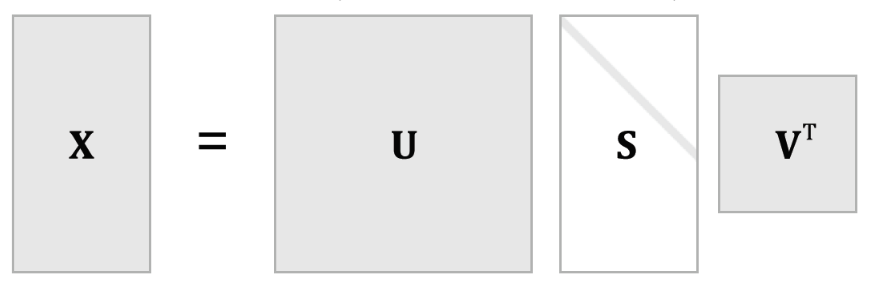

- U는 직교행렬이다. 이 직교행렬은 어떠한 공간의 축을 형성한다. 지금의 맥락상 U행렬을 단어 공간으로 취급할 수 있다.
- 또한 S는 대각행렬로, 그 대각성분에는 특잇값이 큰 순서로 나열되어 있다.
- 특잇값이란 쉽게 말해 해당 축의 중요도라고 간주할 수 있다.
- 중요도가 낮은 원소(특잇값이 작은 원소)를 깎아내는 방법을 생각해볼 수 있다.

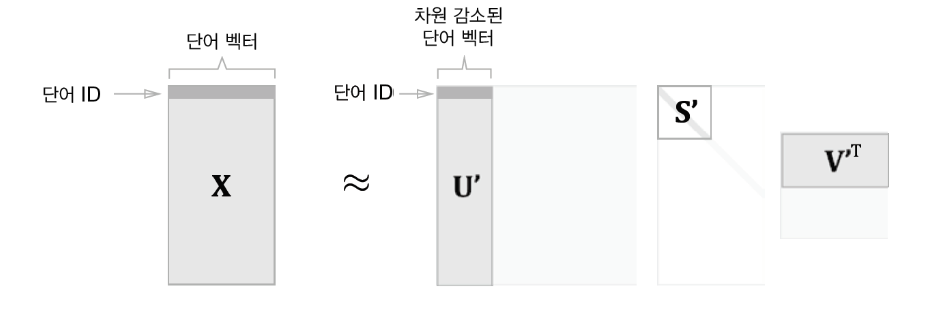

- 헹렬 S에서 특잇값이 작다면 중요도가 낮다는 뜻이므로
- 행렬 U에서 여분의 열벡터를 깎아내어 원래의 행렬을 근사할 수 있다.
- 이 문제로 가져와서 PPMI에 적용해보자
  - 행렬 X의 각 행에는 해당단어 ID의 단어 벡터가 저장되어 있다.
  - 그 단어 벡터가 행렬 U라는 차원 감소된 벡터로 표현되는 것이다.

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥2/")
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vacab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

In [ ]:
print(C[0])

[0 1 0 0 0 0 0]


In [ ]:
print(W[0])

[0.    1.807 0.    0.    0.    0.    0.   ]


In [ ]:
print(U[0])

[ 3.409e-01 -1.110e-16 -1.205e-01 -4.163e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


In [ ]:
print(U[0,:2])

[ 3.409e-01 -1.110e-16]


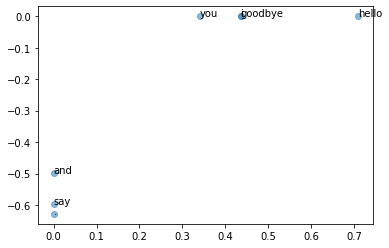

In [ ]:
for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:,0],U[:,1], alpha=0.5)
plt.show()

### 4) PTB 데이터셋

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/인공지능/밑시딥2/')
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:',len(corpus))
print('corpus[:30]', corpus[:30])
print()
print('id_to_word[0]:',id_to_word[0])
print('id_to_word[1]:',id_to_word[1])
print('id_to_word[2]:',id_to_word[2])
print()
print('word_to_id[car]:',word_to_id['car'])
print('word_to_id[happy]:',word_to_id['happy'])
print('word_to_id[lexus]:',word_to_id['lexus'])

말뭉치 크기: 929589
corpus[:30] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id[car]: 3856
word_to_id[happy]: 4428
word_to_id[lexus]: 7426


### 5) PTB데이터셋 평가

In [ ]:
# coding: utf-8
import sys
sys.path.append('/content/drive/MyDrive/인공지능/밑시딥2/')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb


window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    # truncated SVD (빠르다!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD (느리다)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


동시발생 수 계산 ...
PPMI 계산 ...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
calculating SVD ...

[query] you
 i: 0.6710059642791748
 we: 0.6006060838699341
 do: 0.54515